## Loading the images dataset

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5])

test_datagen = ImageDataGenerator(
                               rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.8, 1.25],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',
                               data_format='channels_last',
                               brightness_range=[0.5, 1.5])

image_size = (128,128)
batch_size = 32

training_data_dir = r'C:\Users\yonba\OneDrive\Desktop\Education\Semester_A_2019\Image_Processing\PhotosDataSet\_Data'
validation_data_dir = r'C:\Users\yonba\OneDrive\Desktop\Education\Semester_A_2019\Image_Processing\PhotosDataSet\_Test'

train_generator=train_datagen.flow_from_directory(training_data_dir,
                                                 target_size=image_size,
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_generator = test_datagen.flow_from_directory(
                                        validation_data_dir,
                                         target_size=image_size,
                                         color_mode='rgb',
                                        class_mode = "categorical")



Found 35416 images belonging to 100 classes.
Found 3986 images belonging to 100 classes.


## Showing thw images

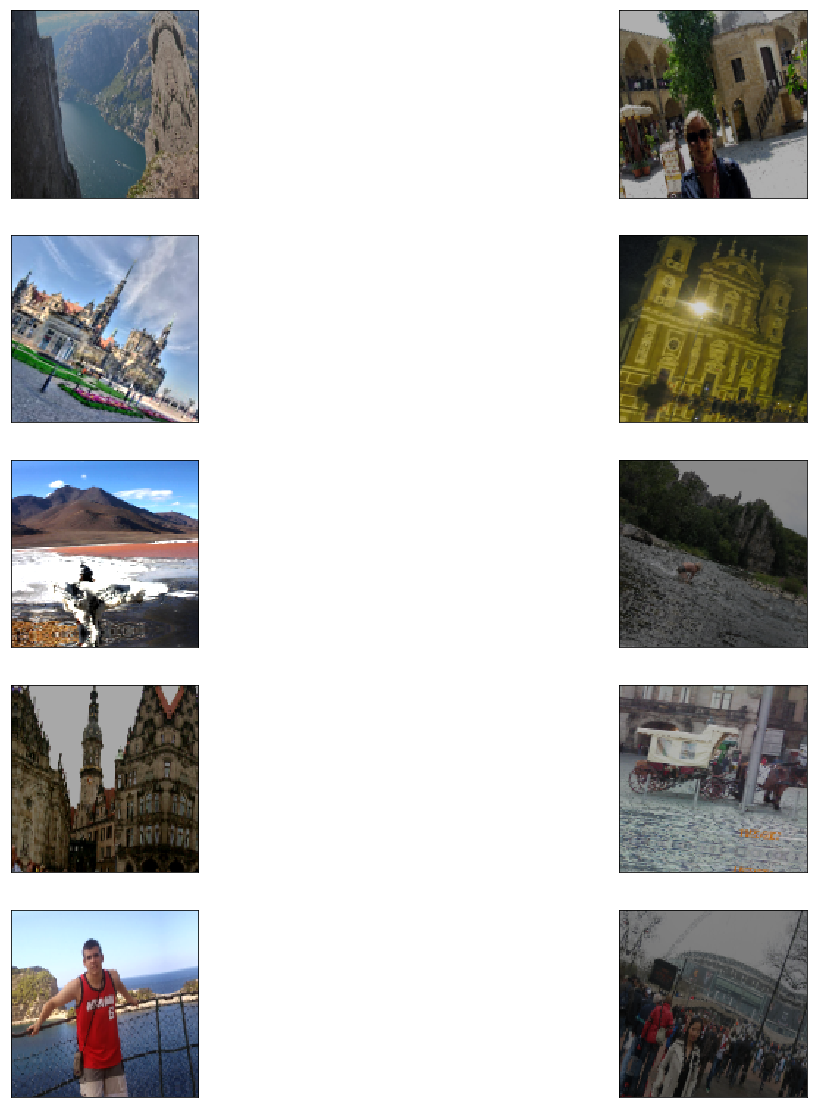

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

x_batch, y_batch = next(train_generator)

plt.figure(figsize=(20, 20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image = x_batch[i]
    image= image.astype(int)
    plt.imshow(image)

## Loading the model

In [15]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, Callback
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
import os

modelFilePath = './resnet_exp1_1551778401.h5'
model = load_model(modelFilePath)
preds = model.get_layer('dense_7').output
final_model=Model(inputs=model.input, outputs=preds)
final_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## Configure loss function and optimizer

In [16]:
final_model.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.5), metrics=["accuracy"])

## Step Size

In [17]:
step_size_train=train_generator.n//train_generator.batch_size
print(step_size_train)

1106


## Creating Loss and Accuracy history callbacks

In [18]:
class LossAccHisotry(Callback):
    def on_train_begin(self,logs={}):
        self.loss_history = []
        self.accuracy_history = []
        self.val_loss_history = []
        self.val_accuracy_history = []
        
    #def on_batch_end(self,batch, logs={}):
        #self.loss_history.append(logs.get('loss'))
        #self.accuracy_history.append(logs.get('acc'))
        
    def on_epoch_end(self, epoch, logs={}):
        self.val_loss_history.append(logs.get('val_loss'))
        self.val_accuracy_history.append(logs.get('val_acc'))
        self.loss_history.append(logs.get('loss'))
        self.accuracy_history.append(logs.get('acc'))
    
history = LossAccHisotry()

## Ignoring images with a bad format

In [19]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

## Setting the network saving time periods

In [20]:
import time

networkfileName = "resnet_exp1_{}.h5".format(int(time.time()))
checkpoint = ModelCheckpoint(networkfileName, monitor='val_acc', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto', period=1)

## Training the model

In [21]:
NumberOfEpochs = 15

final_model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   epochs=NumberOfEpochs,
                   callbacks = [history, checkpoint])## Loss and Accuracy graphs

Epoch 1/15
1105/1106 [============================>.] - ETA: 0s - loss: 0.0116 - acc: 0.9965
Epoch 00001: val_acc improved from -inf to 0.97366, saving model to resnet_exp1_1551787526.h5
1106/1106 [==============================] - 560s 506ms/step - loss: 0.0116 - acc: 0.9965 - val_loss: 0.1217 - val_acc: 0.9737
Epoch 2/15
1105/1106 [============================>.] - ETA: 0s - loss: 0.0096 - acc: 0.9973
Epoch 00002: val_acc improved from 0.97366 to 0.97466, saving model to resnet_exp1_1551787526.h5
1106/1106 [==============================] - 530s 479ms/step - loss: 0.0096 - acc: 0.9973 - val_loss: 0.1200 - val_acc: 0.9747
Epoch 3/15
1105/1106 [============================>.] - ETA: 0s - loss: 0.0106 - acc: 0.9970
Epoch 00003: val_acc did not improve from 0.97466
1106/1106 [==============================] - 524s 474ms/step - loss: 0.0106 - acc: 0.9970 - val_loss: 0.1314 - val_acc: 0.9737
Epoch 4/15
1105/1106 [============================>.] - ETA: 0s - loss: 0.0099 - acc: 0.9972
Epoch 

## Loss and Accuracy graphs

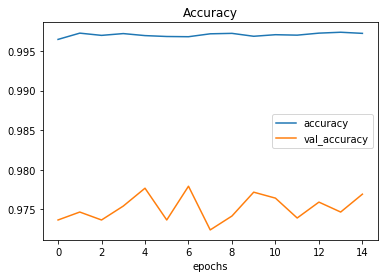

In [22]:
import matplotlib.pyplot as plt
x = range(0, len(history.accuracy_history))
plt.plot(x, history.accuracy_history)
plt.plot(x, history.val_accuracy_history)
plt.xlabel('epochs')
plt.title('Accuracy')
plt.legend(['accuracy', 'val_accuracy'])

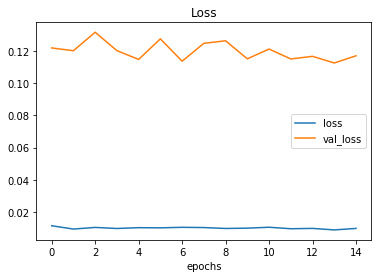

In [23]:
x = range(0, len(history.loss_history))
plt.plot(x, history.loss_history)
plt.plot(x, history.val_loss_history)
plt.xlabel('epochs')
plt.title('Loss')
plt.legend(['loss', 'val_loss'])